### **Import Libraries**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import pickle
import random

### **Load the Dataset**

In [2]:
# load data from the pickle files

with open('../input/traffic-sign-classification/train.p', mode = 'rb') as training_data:
    train = pickle.load(training_data)
with open('../input/traffic-sign-classification/test.p', mode = 'rb') as testing_data:
    test = pickle.load(testing_data)
with open('../input/traffic-sign-classification/valid.p', mode = 'rb') as validation_data:
    valid = pickle.load(validation_data)

In [3]:
X_train, y_train = train['features'], train['labels'] 
X_valid, y_valid = valid['features'], valid['labels'] 
X_test, y_test = test['features'], test['labels']

print('Shape of train data:\t\t X =', X_train.shape,'\t y =', y_train.shape)
print('Shape of validation data:\t X =', X_valid.shape,'\t\t y =', y_valid.shape)
print('Shape of test data:\t\t X =', X_test.shape,'\t y =', y_test.shape)

Shape of train data:		 X = (34799, 32, 32, 3) 	 y = (34799,)
Shape of validation data:	 X = (4410, 32, 32, 3) 		 y = (4410,)
Shape of test data:		 X = (12630, 32, 32, 3) 	 y = (12630,)


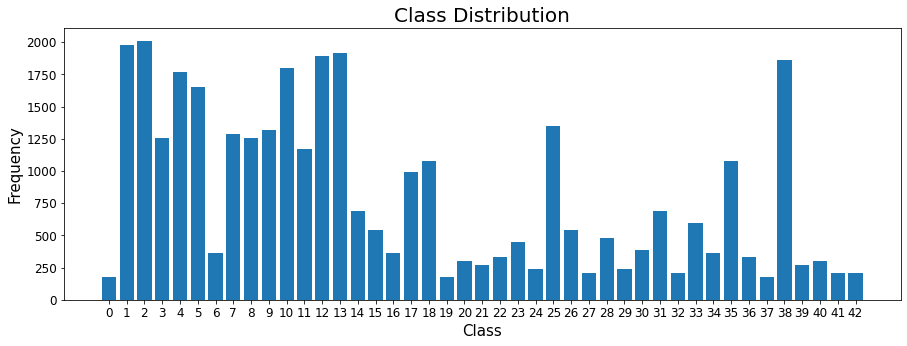

In [4]:
# check the class distribution
# the dataset has 43 different classes of traffic signs
uniqueValues, occurCount = np.unique(y_train, return_counts=True)
class_dist = dict(zip(uniqueValues, occurCount))
plt.figure(figsize=(15,5))
plt.bar(list(class_dist.keys()), class_dist.values(), 0.8)
plt.xticks(range(43), fontsize = 12)
plt.yticks(fontsize = 12)
plt.title('Class Distribution', fontsize = 20)
plt.xlabel('Class', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.show()

### **Perform Image Visualization**

13

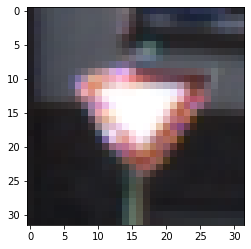

In [5]:
# visualize any one image from train data
i = np.random.randint(1,len(X_train))
plt.imshow(X_train[i])
y_train[i]

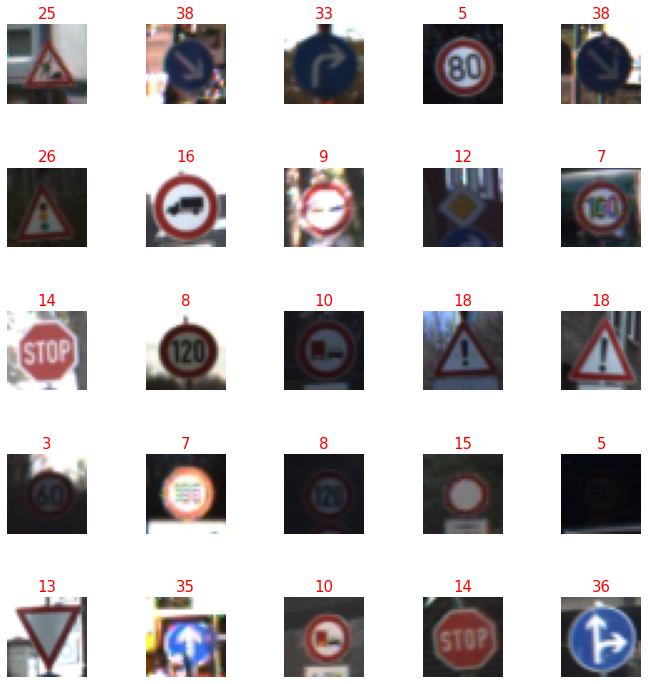

In [6]:
# let's visualize some more images in a grid format
# define the dimensions of the plot grid
W_grid = 5
L_grid = 5

# subplot returns figure object and axes object
# axes object can be used to plot specific figures at various locations
fig, axes = plt.subplots(L_grid, W_grid, figsize = (12,12))

axes = axes.ravel() # flatten the 5x5 matrix into 25 array

for i in np.arange(0, L_grid * W_grid):
    
    # select a random number
    index = np.random.randint(0,  len(X_train))
    
    #read and display an image with the selected index
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index], fontsize = 15, color = 'red')
    axes[i].axis('off')

plt.subplots_adjust(hspace = 0.8)

### **Convert Images to Grayscale and Normalize**

In [7]:
from sklearn.utils import shuffle
# shuffle train data to ensure a random order input
X_train, y_train = shuffle(X_train, y_train)

In [8]:
# convert to grayscale
X_train_gray = np.sum(X_train/3, axis = 3, keepdims = True)
X_valid_gray = np.sum(X_valid/3, axis = 3, keepdims = True)
X_test_gray = np.sum(X_test/3, axis = 3, keepdims = True)

print('Shape of grayscale train data:\t\t X =', X_train_gray.shape,'\t y =', y_train.shape)
print('Shape of grayscale validation data:\t X =', X_valid_gray.shape,'\t\t y =', y_valid.shape)
print('Shape of grayscale test data:\t\t X =', X_test_gray.shape,'\t y =', y_test.shape)

Shape of grayscale train data:		 X = (34799, 32, 32, 1) 	 y = (34799,)
Shape of grayscale validation data:	 X = (4410, 32, 32, 1) 		 y = (4410,)
Shape of grayscale test data:		 X = (12630, 32, 32, 1) 	 y = (12630,)


In [9]:
# normalize the data
X_train_gray_norm = (X_train_gray - 128)/128
X_valid_gray_norm = (X_valid_gray - 128)/128
X_test_gray_norm = (X_test_gray - 128)/128

<Figure size 432x288 with 0 Axes>

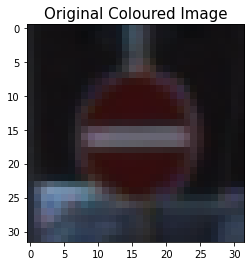

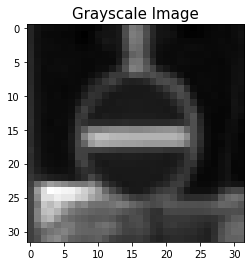

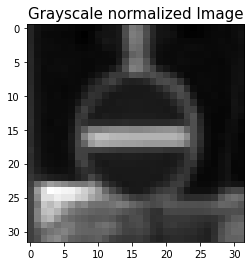

<Figure size 432x288 with 0 Axes>

In [10]:
# compare the original image with the grayscale and grayscale-normalized images
i = np.random.randint(0, len(X_train))
plt.imshow(X_train[i])
plt.title('Original Coloured Image', fontsize = 15)
plt.figure()
plt.imshow(X_train_gray[i].squeeze(), cmap = 'gray')
plt.title('Grayscale Image', fontsize = 15)
plt.figure()
plt.imshow(X_train_gray_norm[i].squeeze(), cmap = 'gray')
plt.title('Grayscale normalized Image', fontsize = 15)
plt.figure()

### **Build Deep Convolutional Neural Network Model**

In [11]:
from tensorflow.keras import datasets, layers, models

CNN_model = models.Sequential()

CNN_model.add(layers.Conv2D(32, (7,7), activation = 'relu', padding = 'valid', input_shape = (32,32,1)))
CNN_model.add(layers.BatchNormalization())
CNN_model.add(layers.Dropout(0.15))

CNN_model.add(layers.Conv2D(64, (3,3), padding = 'valid', activation = 'relu'))
CNN_model.add(layers.MaxPooling2D())
CNN_model.add(layers.BatchNormalization())
CNN_model.add(layers.Dropout(0.25))

CNN_model.add(layers.Conv2D(64, (3,3), padding = 'valid', activation = 'relu'))
CNN_model.add(layers.MaxPooling2D())
CNN_model.add(layers.BatchNormalization())
CNN_model.add(layers.Dropout(0.35))

CNN_model.add(layers.Flatten())

CNN_model.add(layers.Dense(240, activation = 'relu'))
CNN_model.add(layers.BatchNormalization())
CNN_model.add(layers.Dropout(0.5))
CNN_model.add(layers.Dense(43, activation = 'softmax'))
CNN_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        1600      
_________________________________________________________________
batch_normalization (BatchNo (None, 26, 26, 32)        128       
_________________________________________________________________
dropout (Dropout)            (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 12, 12, 64)        256       
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0

### **Compile and Train Deep CNN Model**

In [12]:
CNN_model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [13]:
# defining the class weights for the loss function
values, counts = np.unique(y_train, return_counts = True)
weights = sum(counts)/counts
class_weights = dict(zip(values,weights))

In [14]:
#save the weights/parameters which give the best validation accuracy
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint("best_model.hdf5", monitor='val_accuracy', verbose=1,
                             save_best_only=True, mode='auto', period=1)
callbacks_list = [checkpoint]

In [15]:
CNN_fit = CNN_model.fit(X_train_gray_norm,
             y_train,
             batch_size = 16,
             epochs = 50,
             verbose = 1,
             validation_data = (X_valid_gray_norm, y_valid),
             class_weight = class_weights,
             callbacks = callbacks_list
            )

Epoch 1/50
2175/2175 [==============================] - ETA: 0s - loss: 116.9319 - accuracy: 0.2854
Epoch 00001: val_accuracy improved from -inf to 0.69546, saving model to best_model.hdf5
2175/2175 [==============================] - 76s 35ms/step - loss: 116.9319 - accuracy: 0.2854 - val_loss: 1.1381 - val_accuracy: 0.6955
Epoch 2/50
2175/2175 [==============================] - ETA: 0s - loss: 43.7062 - accuracy: 0.6627
Epoch 00002: val_accuracy improved from 0.69546 to 0.81633, saving model to best_model.hdf5
2175/2175 [==============================] - 75s 35ms/step - loss: 43.7062 - accuracy: 0.6627 - val_loss: 0.6403 - val_accuracy: 0.8163
Epoch 3/50
2175/2175 [==============================] - ETA: 0s - loss: 23.2922 - accuracy: 0.8101
Epoch 00003: val_accuracy improved from 0.81633 to 0.91837, saving model to best_model.hdf5
2175/2175 [==============================] - 76s 35ms/step - loss: 23.2922 - accuracy: 0.8101 - val_loss: 0.2934 - val_accuracy: 0.9184
Epoch 4/50
2175/2175

### **Asses the Performance of Trained Model on Test Data**

In [16]:
score = CNN_model.evaluate(X_test_gray_norm, y_test)
print('Test Accuracy: {}'.format(100*score[1]))

395/395 [==============================] - 5s 12ms/step - loss: 0.0672 - accuracy: 0.9800
Test Accuracy: 98.00475239753723


### **Use the Saved Weights/Parameters for Evaluation**

In [17]:
CNN_model.load_weights("best_model.hdf5")
CNN_model.compile(optimizer = 'Adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
score = CNN_model.evaluate(X_test_gray_norm, y_test)
print('Test Accuracy using the saved parameters: {}'.format(100*score[1]))

395/395 [==============================] - 5s 12ms/step - loss: 0.0672 - accuracy: 0.9800
Test Accuracy using the saved parameters: 98.00475239753723


In [18]:
CNN_fit.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [19]:
# get the loss and accuracy for each epoch
train_loss = CNN_fit.history['loss']
train_acc = CNN_fit.history['accuracy']
val_loss = CNN_fit.history['val_loss']
val_acc = CNN_fit.history['val_accuracy']

Text(0.5, 1.0, 'Training and Validation Loss')

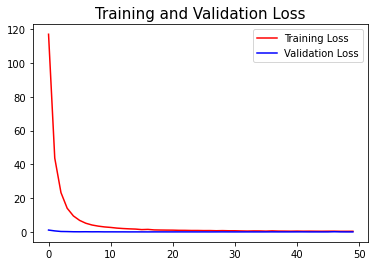

In [20]:
# plot the training and validation loss
epochs = range(len(train_acc))
plt.plot(epochs, train_loss, 'r', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.legend()
plt.title('Training and Validation Loss', size = 15)

Text(0.5, 1.0, 'Training and Validation Accuracy')

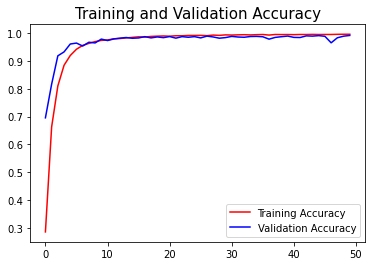

In [21]:
# plot the training and validation accuracy
epochs = range(len(train_acc))
plt.plot(epochs, train_acc, 'r', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy', size = 15)

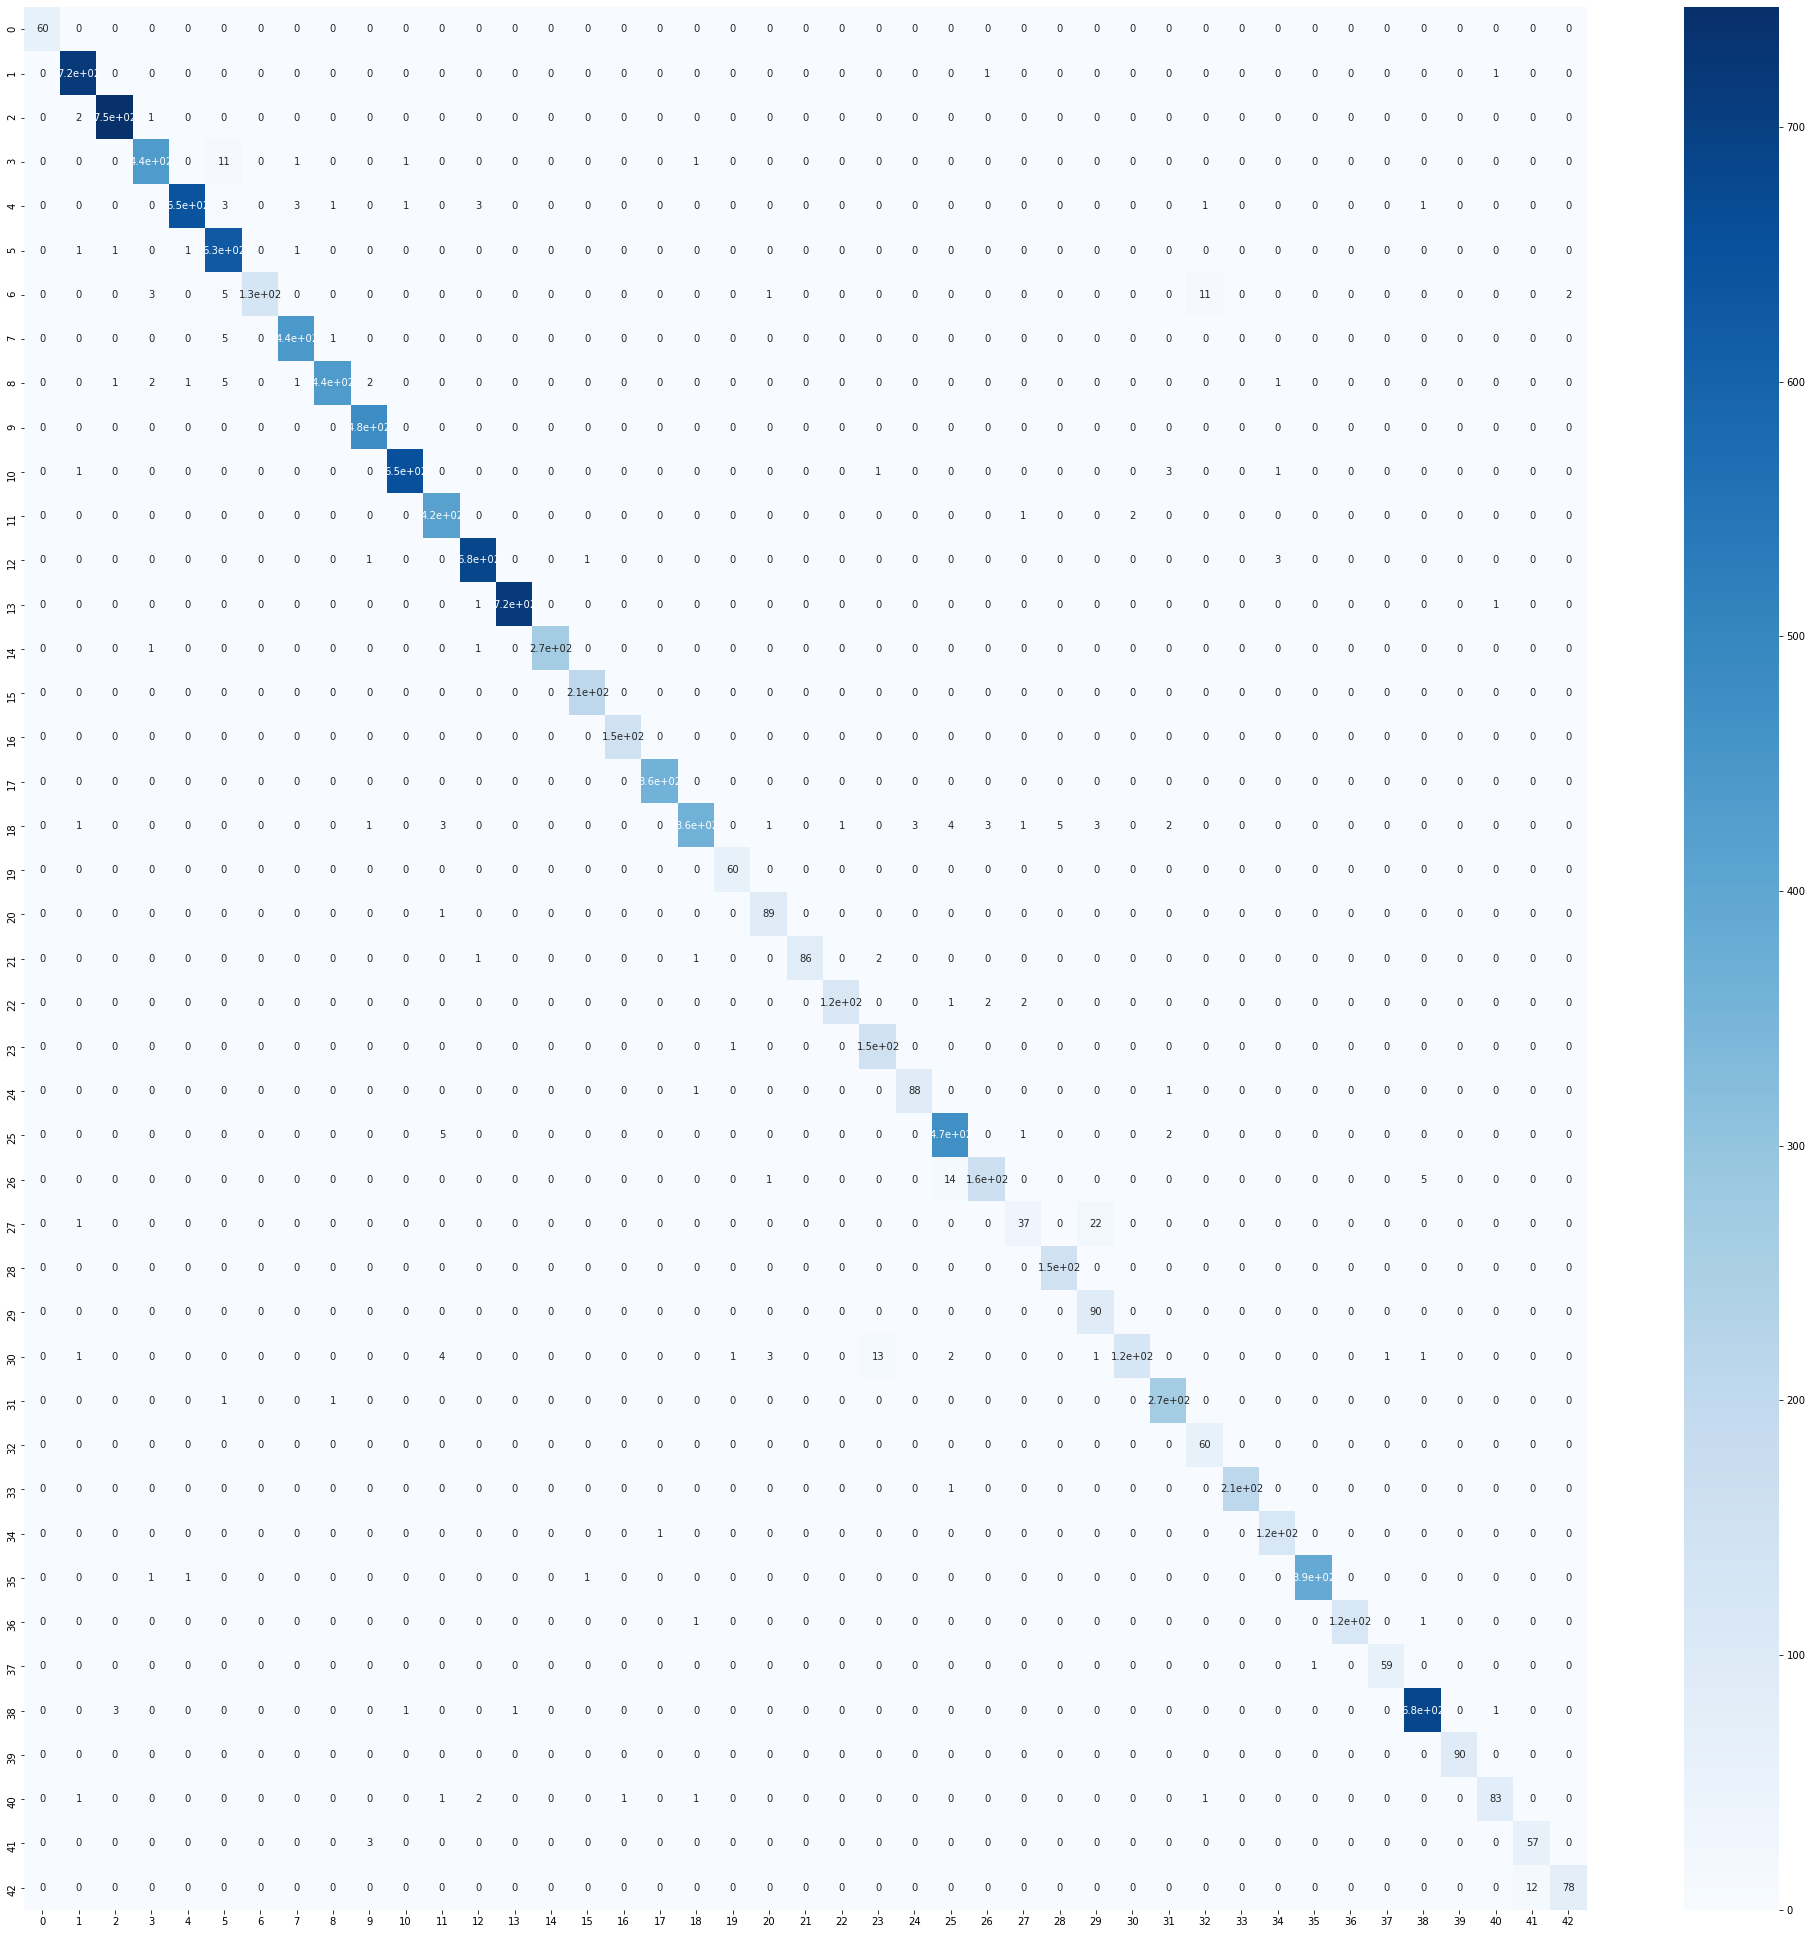

In [22]:
# plot the confusion matrix
predicted_classes = CNN_model.predict_classes(X_test_gray_norm)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted_classes)
plt.figure(figsize = (35,35))
sns.heatmap(cm, annot = True, cmap="Blues")

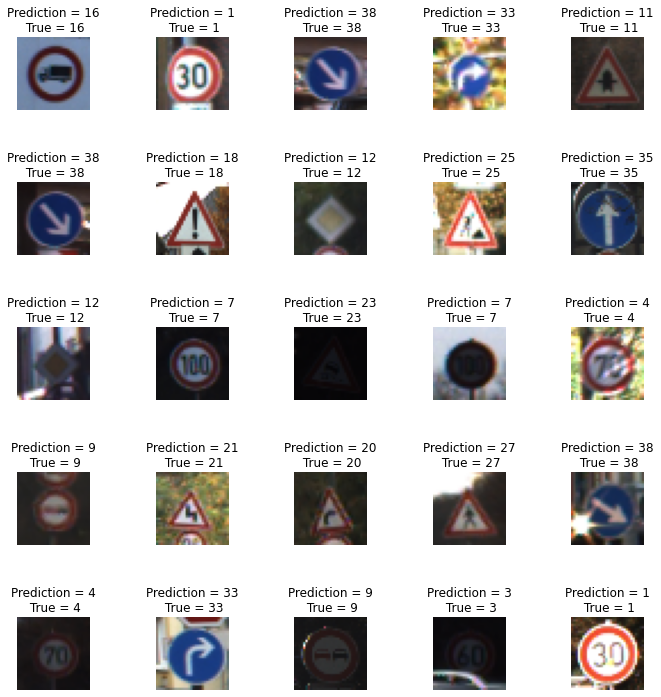

In [23]:
# check actual class label vs predicted class label
# define dimensions of the plot grid
L = 5
W = 5

# subplot returns figure object and axes object
# axes object can be used to plot specific figures at various locations
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel() # flatten the 5x5 matrix into 25 array

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_test[i]))
    axes[i].axis('off')
    
plt.subplots_adjust(hspace = 1)